In [15]:
#Importing required Packages for analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
city = pd.read_csv("Data/city_data.csv")
glob = pd.read_csv("Data/global_data.csv")
print(city.head(5))
print("\n" + "-"*50 + "\n")
print(glob.head(5))

   year     city        country  avg_temp
0  1849  Abidjan  Côte D'Ivoire     25.58
1  1850  Abidjan  Côte D'Ivoire     25.52
2  1851  Abidjan  Côte D'Ivoire     25.67
3  1852  Abidjan  Côte D'Ivoire       NaN
4  1853  Abidjan  Côte D'Ivoire       NaN

--------------------------------------------------

   year  avg_temp
0  1750      8.72
1  1751      7.98
2  1752      5.78
3  1753      8.39
4  1754      8.47


In [17]:
#get data for Dallas, TX
dallas = city[city["city"]== "Dallas"]
glob_filter = glob[glob['year']>= dallas['year'].iloc[0]]
dallas.head(5)

,year,city,country,avg_temp
17686,1820,Dallas,United States,16.88
17687,1821,Dallas,United States,17.33
17688,1822,Dallas,United States,17.87
17689,1823,Dallas,United States,17.46
17690,1824,Dallas,United States,17.90


In [18]:
# Moving avg for global and Dallas data
for i in range(dallas.shape[0]-5):
    total = 0  # To calculate a sum to get the avg.
    for j in range(5): #find sum of 5 years of avg_temp value to get te moving avg.
        total+= float(dallas.iloc[i+j,3])
    dallas.loc[dallas.index[i+4],'Mov_Avg_5'] = np.round(total/5,2)
    
dallas.head(20)

C:\Users\Nagar\anaconda3\envs\Weather_Data_Analysis\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Nagar\anaconda3\envs\Weather_Data_Analysis\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,year,city,country,avg_temp,Mov_Avg_5
17686,1820,Dallas,United States,16.88,NaN
17687,1821,Dallas,United States,17.33,NaN
17688,1822,Dallas,United States,17.87,NaN
17689,1823,Dallas,United States,17.46,NaN
17690,1824,Dallas,United States,17.90,17.49
17691,1825,Dallas,United States,18.38,17.79
17692,1826,Dallas,United States,17.93,17.91
17693,1827,Dallas,United States,18.62,18.06
17694,1828,Dallas,United States,18.26,18.22
17695,1829,Dallas,United States,17.89,18.22


In [19]:
for i in range(glob_filter.shape[0]-5):
    total = 0  # To calculate a sum to get the avg.
    for j in range(5): #find sum of 5 years of avg_temp value to get te moving avg.
        total+= float(glob_filter.iloc[i+j,1])
    glob_filter.loc[glob_filter.index[i+4],'Mov_Avg_5'] = np.round(total/5,2)
    
glob_filter.head(20)

C:\Users\Nagar\anaconda3\envs\Weather_Data_Analysis\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Nagar\anaconda3\envs\Weather_Data_Analysis\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,year,avg_temp,Mov_Avg_5
70,1820,7.62,NaN
71,1821,8.09,NaN
72,1822,8.19,NaN
73,1823,7.72,NaN
74,1824,8.55,8.03
75,1825,8.39,8.19
76,1826,8.36,8.24
77,1827,8.81,8.37
78,1828,8.17,8.46
79,1829,7.94,8.33


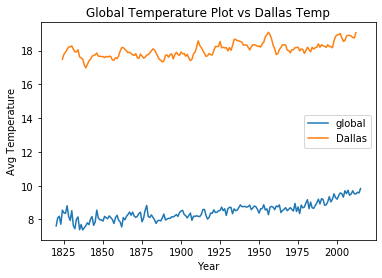

In [20]:
plt.plot(glob_filter['year'], glob_filter['avg_temp'], label = "global")

plt.plot(dallas['year'], dallas['Mov_Avg_5'], label = 'Dallas')

plt.xlabel("Year")
plt.ylabel("Avg Temperature")
plt.title('Global Temperature Plot vs Dallas Temp')
plt.legend()
plt.show()


